# CMM 262: Introduction to Statistics, Day 1/2 (Summary Statistics and Visualizing Data)

## Notebook Information

Since you spent Week 1 learning some Python and UNIX commands, I've re-adapted this lesson in **Python** instead of R for 2026! However, the R code is still available online (you can find the 2025 iteration from Graham [here](https://github.com/biom262/bnfo262-2025/blob/main/module-2-statistics/Day1_1_Statistics_and_Data_Visualization.Rmd)) in case you're interested in comparing the differences between the two languages.

### Contributors

* **Clarence Mah**, Ph.D. (CMM 262, 2020-2021)
* **Michelle Franc Ragsac**, Ph.D. (CMM 262, 2020-2021, 2026)
* **Graham McVicker**, Ph.D. (CMM 262, 2022-2024)

## Dataset Background

As mentioned during the in-class lecture, we will be going through the **Palmer Penguins** dataset in this Jupyter Notebook! The Palmer Penguins dataset is based on data points collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pal.lternet.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

I've uploaded the dataset to the repository for this class from an [upload somebody made to GitHub Gists](https://gist.github.com/slopp/ce3b90b9168f2f921784de84fa445651) so we can easily interact with things.

## Notebook Dependencies

Before we even go into the dataset, we can start off by importing the Python packages (or `dependencies`) that are needed to properly run the code in this notebook. These packages should look familiar (e.g., `pandas`, `matplotlib`, and `seaborn`)

The information here is a review from the exercises from last week, but I wanted to include the information here just in case you wanted to re-read things! :-)

> The [`pandas`](https://pandas.pydata.org/) package is commonly used to interact with table-like data and perform various operations on it. You can think of it like Microsoft Excel, Apple Numbers, Google Sheets, etc. but instead of mostly looking at things visually, you'll be performing calculations and visualizations based on on rows and columns!
> 
> The [`matplotlib`](https://matplotlib.org/) package allows you to visualize data in Python. While it's pretty barebones, it is **extremely** powerful and allows you to fine-tune plots to your liking! You can create things such as sub-panels for figures, as well as customize the color and sizing of plots.
> 
> Finally, this is optional, but another commonly used package is [`seaborn`](https://seaborn.pydata.org/). You can think of `seaborn` as a wrapper for `matplotlib` to make things prettier! However, since it was built with statistical visualizations in mind, it has additional capabilities to make generation of commonly used scientific plots a little easier (i.e., clustering heatmaps with the [`seaborn.clustermap()`](https://seaborn.pydata.org/generated/seaborn.clustermap.html) method, which we'll preview at the end of this notebook).

### Importing Packages of Interest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

With all of our packages imported and aliased to easier names for us to interact with, we can continue with the rest of the exercise!

---

## Exercise 1: Summary Statistics

First, we have to import the data! Let's take a look at what files can be found in our `data/` directory with a `bash` magic function to do a quick `ls` into the directory that we should have our data stored in.

<div class="alert alert-block alert-info">
<b>Info: Magic Functions in Jupyter Notebooks</b>
    <p></p>
    <p>Jupyter Notebook has "magics," which are special functions that allow you to perform non-Python-code functions. In the cell below, I'm using a <code>bash</code> magic to quickly run a command. You can find more information on magics in the iPyKernel <a href="https://ipython.readthedocs.io/en/stable/interactive/magics.html#cell-magics">documentation</a>.</p>
</div>

In [2]:
%%bash

ls data/

penguins.csv


### Import the `data/penguins.csv` Dataset into a `pandas` DataFrame

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #1: Importing the Palmer Penguins Dataset</b>
    <p></p>
    <p>Since you learned how to import files into the Jupyter Notebook workspace with <code>pandas</code> last week, how would you import our Palmer Penguins dataset, knowing that it is in <code>.csv</code> format and that the first column is the index column?</p>
    <p>Also, import the data into a variable called <code>df</code>, then preview the top few rows of the DataFrame.</p>
</div>

In [3]:
# TODO
# ...

# ------------------------------------------------
# Answer
# ------------------------------------------------
df = pd.read_csv("data/penguins.csv", index_col=0)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


### Previewing and Summarizing the Data in a `pandas` Dataframe

#### The `pd.DataFrame.describe()` function

Now that we have the data imported into the `df` variable, we can start running some other commands to understand what the data looks like.

One helpful command that I typically run when I first import a dataset is `pd.DataFrame.describe()`. Let's run that command on our DataFrame in the code cell below!

In [4]:
# TODO
# ...

# -----------
# Answer
# -----------
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


From this output, you can see that we can easily gather summary statistic information from all of the numeric columns! `pandas` is able to detect the `type` of different columns in a DataFrame when you import it, but it can sometimes get this wrong.

I also recommend that you peek at the documentation to see what the [`pd.DataFrame.describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function does and see what options or `parameters` you can provide to the method to customize the output.

<div class="alert alert-block alert-info">
<b>Info: Viewing Python Package Documentation</b>
    <p></p>
    <p>You can easily load the documentation on file for whatever package you have in Jupyter Lab by enabling the <bold>Contextual Help</bold> panel from the <bold>Help</bold> menu of the upper toolbar. The panel should update with the documentation for the method that your cursor is currently activated on in the code cell.</p>
    <p>In other software, such as Visual Studio Code, you can also view the documentation by simply hovering your mouse over the method you are interested in learning more about. I suggest looking into how your software of interest allows you to view programming documentation within the application itself! It can be much handier instead of looking things up online.</p>
</div>

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #2: Previewing Numerical Data in a DataFrame</b>
    <p></p>
    <p>From the output that we currently have with the <code>pd.DataFrame.describe()</code> function, you can see that we have calculated the <code>bill_length_mm</code>, <code>bill_depth_mm</code>, <code>flipper_length_mm</code>, <code>body_mass_g</code>, and <code>year</code> summary statistics for the 25th, 50th, and 75th percenties.</p>
    <p>How would you modify the function call to look at the 10th, 90th, 95th, and 99th percentiles?</p>
</div>

In [5]:
# TODO

# -------------------------------------------------------
# Answer
# -------------------------------------------------------
# We can provide the percentiles that we're interested in
# to the percentiles parameter as a list of float values
# -------------------------------------------------------
df.describe(percentiles=[.1, .9, .95, .99])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
10%,36.600000,14.300000,185.000000,3300.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
90%,50.800000,19.500000,220.900000,5400.000000,2009.000000
95%,51.995000,20.000000,225.000000,5650.000000,2009.000000
99%,55.513000,21.100000,230.000000,5979.500000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


#### The `pd.DataFrame.info()` function

Another command that I find useful in previewing the data I'm working with in Python is the `pd.DataFrame.info()`.

In [6]:
# TODO

# -----------
# Answer
# -----------
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 24.2+ KB


This function provides a summary of the DataFrame, including the dimensions of the DataFrame, the names of the columns that are present, the number of null values per column, the types detected by `pandas` within each column, and the amount of memory required for the DataFrame.

<div class="alert alert-block alert-success">
<b>Tip: Previewing DataFrame Memory Usage</b>
    <p></p>
    <p>The <code>pd.DataFrame.info()</code> command is a great way to quickly look at what your data looks like in addition to the <code>pd.DataFrame.describe()</code> function. However, since biological datasets can be quite large, the <code>pd.DataFrame.info()</code> command can be especially helpful to preview the memory usage of a DataFrame.</p>
    <p>If the DataFrame is quite large, oftentimes, this result will show a numerical value then a <code>+</code> symbol. You can view the exact memory usage of a DataFrame by providing the <code>memory_usage='deep'</code> parameter.</p>
</div>

In [7]:
# TODO

# --------------------------
# Answer
# --------------------------
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 344 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 71.2 KB


### Slicing `pandas` DataFrames into Different Subsets of Interest

#### Using Specific Criteria for Slicing Data with `pd.DataFrame.loc[]`

When you have a large dataset, you're oftentimes interested in looking at different slices or subsets of the data.

Some common categories would be to slice the data on categorical information (e.g., `male` versus `female`), then gather summary statistics (e.g., mean, median, standard deviation) on these subsets.

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #3: Slicing the Palmer Penguins Dataset</b>
    <p></p>
    <p>Since you learned how to subset the <code>pandas</code> DataFrames with the <code>pd.DataFrame.loc[]</code> function in last week's exercises, how would you slice our DataFrame to only contain <code>male</code> and <code>female</code> Chinstrap penguins?</p>
    <p>Save these two resulting DataFrames into two variables: <code>df_chinstrap_m</code> and <code>df_chinstrap_f</code>.</p>
</div>

In [8]:
# TODO

# --------------------------
# Answer
# --------------------------
# One way to do this is to first subset by the type of penguin, then split things up
df_chinstrap = df.loc[df["species"] == "Chinstrap"]
df_chinstrap_m = df_chinstrap.loc[df_chinstrap["sex"] == "male"]
df_chinstrap_f = df_chinstrap.loc[df_chinstrap["sex"] == "female"]

# However, you can also provide multiple filtering parameters to a loc (& = AND)
df_chinstrap_m = df.loc[(df["sex"] == "male") & (df["species"] == "Chinstrap")]
df_chinstrap_f = df.loc[(df["sex"] == "female") & (df["species"] == "Chinstrap")]

df_chinstrap_m.head() # preview the male chinstrap penguins

# =================
# Michelle's Notes:
# =================
# The option that you choose can depend on the data that you're looking at!

# For example, if you have a small DataFrame, then operations like the second
# answer might run very fast, whereas if you have a larger DataFrame that you want
# to work with in multiple fashions (i.e., multiple subsets of Chinstrap penguins),
# the first option might make more sense.

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
278,Chinstrap,Dream,50.0,19.5,196.0,3900.0,male,2007
279,Chinstrap,Dream,51.3,19.2,193.0,3650.0,male,2007
281,Chinstrap,Dream,52.7,19.8,197.0,3725.0,male,2007
284,Chinstrap,Dream,51.3,18.2,197.0,3750.0,male,2007
286,Chinstrap,Dream,51.3,19.9,198.0,3700.0,male,2007


For the `pd.DataFrame.loc[]` function, you can subset by values contained within columns like we did here, but you can also subset by particular rows (or `indices`). This may be useful if you are looking at a particular subset of samples that you know *a priori*.

In [9]:
# I randomly came up with this set of numbers ...
sample_subset = [1, 5, 20, 40, 43, 55, 200, 245, 280, 286]

With this subset of samples, we can simply provide these indicies to `pd.DataFrame.loc[]` to only look at these rows!

In [10]:
# TODO

# -------------------
# Answer
# -------------------
df.loc[sample_subset]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
rowid,,,,,,,,
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
20,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male,2007
40,Adelie,Dream,39.8,19.1,184.0,4650.0,male,2007
43,Adelie,Dream,36.0,18.5,186.0,3100.0,female,2007
55,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008
200,Gentoo,Biscoe,50.5,15.9,225.0,5400.0,male,2008
245,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,female,2009
280,Chinstrap,Dream,45.4,18.7,188.0,3525.0,female,2007


#### Subsetting by Columns of Interest

In addition to grabbing just **rows** of interest, we can also slice the data to only obtain columns of interest! The notation for this is extremely similar to gathering row indicies of interest from a DataFrame.

In [11]:
# Say we're interested in just looking at penguin bill information
column_subset = ["bill_length_mm", "bill_depth_mm"]

In [12]:
# TODO

# ---------------
# Answer
# ---------------
df_subset = df[column_subset]
df_subset.head()

,bill_length_mm,bill_depth_mm
rowid,,
1,39.1,18.7
2,39.5,17.4
3,40.3,18.0
4,NaN,NaN
5,36.7,19.3


As you can see, you can subset by columns of interest by providing a `list` object with the column names that you're interested in!

<div class="alert alert-block alert-success">
<b>Tip: Subsetting by an Individual Column</b>
    <p></p>
    <p>You can also subset by a <bold>single</bold> column, but that column needs to also be provided as a <code>list</code>!</p>
    <p>For example, to just look at the <code>bill_length_mm</code> column in this example, you can use the command <code>df[["bill_length_mm"]]</code> to directly provide the column of interest to the subsetting function (i.e., the double brackets, <code>pd.DataFrame[[]]</code>).</p>
</div>

<div class="alert alert-block alert-danger">
<b>Caution: Subsetting Columns Only Considers Those Provided</b>
    <p></p>
    <p>When you subset by columns, you will only retain the columns and the index column for your DataFrame. Therefore, if you forget to include any important columns containing identifying information (i.e., a specific <code>SAMPLE_ID</code> or <code>SUBJECT_ID</code> column that you would prefer to use), that information will be lost.</p>
</div>

With this information in mind, we can start to look at summary statistics within a DataFrame!

### Gathering Mean, Variance, and Standard Deviation with `pandas`

Now that we have some subsets, we can perform calculations on columns of interest within our DataFrames to compare summary statistics between the entire dataset and compare them to the `male` and `female` `Chinstrap` penguins!

#### Formula Refresher

As an easy exercise (*and to get more minutes with Python*), lets calculate things **manually** for the sample mean, sample variance, and sample standard deviation given the formulas that we went over in the lecture.

$$ \text{Sample Mean} : \bar{x} = \frac{ \sum_{i=1}^{n} x_i }{n} $$

$$ \text{Sample Variance} : \sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2 }{n-1} $$

$$ \text{Sample Standard Deviation} : \sigma = \sqrt{ \sigma^2 } = \sqrt{ \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2 }{n-1} } $$

Remember, the denominator in these calculations changes to $(n-1)$ for the sample variance and sample standard deviation whereas the calculations for the population versions of these formulas uses $n$ as the denominator; this is known as **Bessel's correction**.

For this portion of our exercise, we will make some Python functions to generate these calculations for us! But before we do that, let's quickly go over some functions that might be helpful for those functions:

| Function | Purpose | Example |
| -------- | ------- | ------- |
| `pd.Series.count()` | Provides the length of a `pandas.Series` object | `df[['column_name']].count()` |
| `pd.Series.sum()` | Provides the sum of the numerical values in a `pandas.Series` object | `df[['column_name']].sum()` |

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #4: Manually Calculating the Mean, Variance, and Standard Deviation</b>
    <p></p>
    <p>If we imagine our Palmer Penguins dataset as our entire population, let's define Python methods to calculate the <b>population</b> mean, variance, and standard deviation for the <code>bill_length_mm</code> in our DataFrame.</p>
    <p>Afterward, define methods to calculate the <b>sample</b> mean, variance, and standard deviation for the male Chinstrap penguins (i.e., <code>df_chinstrap_m</code>) and female Chinstrap penguins (i.e., <code>df_chinstrap_f</code>).</p>
</div>

In [13]:
# TODO

# --------------------------------------------------------
# Answer: Define Methods
# --------------------------------------------------------
def calculate_mean(df: pd.DataFrame, column_name: str):
    x_vector = df[[column_name]]
    return (x_vector.sum() / x_vector.count()).iloc[0]

def calculate_variance(df: pd.DataFrame, column_name: str, sample: bool):
    x_vector = df[[column_name]]
    mean = calculate_mean(df, column_name)
    x_sum = (( x_vector - mean ) ** 2).sum()
    n = x_vector.count()
    if sample:
        return (x_sum / (n-1)).iloc[0]
    return (x_sum / n).iloc[0]

def calculate_standard_deviation(df: pd.DataFrame, column_name: str, sample: bool):
    return calculate_variance(df, column_name, sample) ** (1/2)

# --------------------------------------------------------
# Answer: Calculate Values
# --------------------------------------------------------
column = "bill_length_mm"
df_bill_len_avg = calculate_mean(df, column)
df_bill_len_var = calculate_variance(df, column, sample=False)
df_bill_len_std = calculate_standard_deviation(df, column, sample=False)

df_m_bill_len_avg = calculate_mean(df_chinstrap_m, column)
df_m_bill_len_var = calculate_variance(df_chinstrap_m, column, sample=False)
df_m_bill_len_std = calculate_standard_deviation(df_chinstrap_m, column, sample=False)

df_f_bill_len_avg = calculate_mean(df_chinstrap_f, column)
df_f_bill_len_var = calculate_variance(df_chinstrap_f, column, sample=False)
df_f_bill_len_std = calculate_standard_deviation(df_chinstrap_f, column, sample=False)

# --------------------------------------------------------
# Print the results ...
# --------------------------------------------------------
print(f"Palmer Penguin   [ {column} ] mean         : {df_bill_len_avg}")
print(f"Palmer Penguin   [ {column} ] variance     : {df_bill_len_var}")
print(f"Palmer Penguin   [ {column} ] standard dev : {df_bill_len_std}")
print("------------------------------------------------- -------------------")
print(f"Male Chinstrap   [ {column} ] mean         : {df_m_bill_len_avg}")
print(f"Male Chinstrap   [ {column} ] variance     : {df_m_bill_len_var}")
print(f"Male Chinstrap   [ {column} ] standard dev : {df_m_bill_len_std}")
print("------------------------------------------------- -------------------")
print(f"Female Chinstrap [ {column} ] mean         : {df_f_bill_len_avg}")
print(f"Female Chinstrap [ {column} ] variance     : {df_f_bill_len_var}")
print(f"Female Chinstrap [ {column} ] standard dev : {df_f_bill_len_std}")
print("")

Palmer Penguin   [ bill_length_mm ] mean         : 43.9219298245614
Palmer Penguin   [ bill_length_mm ] variance     : 29.71989919975377
Palmer Penguin   [ bill_length_mm ] standard dev : 5.4515960231618195
------------------------------------------------- -------------------
Male Chinstrap   [ bill_length_mm ] mean         : 51.09411764705882
Male Chinstrap   [ bill_length_mm ] variance     : 2.3758477508650513
Male Chinstrap   [ bill_length_mm ] standard dev : 1.5413785229024866
------------------------------------------------- -------------------
Female Chinstrap [ bill_length_mm ] mean         : 46.57352941176471
Female Chinstrap [ bill_length_mm ] variance     : 9.379593425605536
Female Chinstrap [ bill_length_mm ] standard dev : 3.0626121898806478



#### The `pandas` Functions for Calculating Mean, Variance, and Standard Deviation

Now that we have these values, the `pandas` equivalents for these calculations is quite straightforward! I've included those functions in the table below, along with other helpful functions that you may need in the future.

| Function | Purpose | Example |
| -------- | ------- | ------- |
| `pd.Series.mean()` | Calculates the mean of the numerical values in a `pd.Series` object | `df[['column_name']].mean()` |
| `pd.Series.var()` | Calculates the variance of the numerical values in a `pd.Series` object | `df[['column_name']].var()` |
| `pd.Series.std()` | Calculates the standard deviation of the numerical values in a `pd.Series` object | `df[['column_name']].var()` |
| **Additional Functions** | ---------- | ---------- |
| `pd.Series.min()` | Determines the **minimum** numerical value present in a `pd.Series` object | `df[['column_name']].min()` |
| `pd.Series.max()` | Determines the **maximum** numerical value present in a `pd.Series` object | `df[['column_name']].max()` |
| `pd.Series.median()` | Determines the **median** numerical value present in a `pd.Series` object | `df[['column_name']].median()` |
| `pd.Series.mode()` | Determines the **modal** numerical value (i.e., most frequent value) present in a `pd.Series` object | `df[['column_name']].mode()` |
| `pd.Series.mad()` | Calculates the **mean absolute deviation** of the numerical values in a `pd.Series` object | `df[['column_name']].mad()` |

<div class="alert alert-block alert-info">
<b>Tip: The Degrees of Freedom Parameter</b>
    <p></p>
    <p>If you look at the documentation for the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html">variance</a> and <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html">standard deviation</a> functions, you'll see that there's a parameter for the degrees of freedom (i.e., <code>ddof</code>).</p>
    <p>By default, this parameter is set to <code>1</code>, therefore, all default calculations will calculate the <bold>sample variance</code> and <code>sample standard deviation</code>. You'll have to modify things to calculation <bold>population</code>-level values.</p>
</div>

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #5: Using Built-In <code>pandas</code> Methods to Calculate Summary Statistics</b>
    <p></p>
    <p>Calculate the population mean, variance, and standard deviation for the <code>bill_length_mm</code> for the entire Palmer Penguins dataset with built-in <code>pandas</code> functions.</p>
    <p>Afterward, calculate the sample mean, variance, and standard deviation for the male Chinstrap penguins (i.e., <code>df_chinstrap_m</code>) and female Chinstrap penguins (i.e., <code>df_chinstrap_f</code>).</p>
</div>

In [14]:
# TODO

# --------------------------------------------------------
# Answer
# --------------------------------------------------------
column = "bill_length_mm"
pd_df_bill_len_avg = df[[column]].mean().iloc[0]
pd_df_bill_len_var = df[[column]].var(ddof=0).iloc[0]
pd_df_bill_len_std = df[[column]].std(ddof=0).iloc[0]

pd_df_m_bill_len_avg = df_chinstrap_m[[column]].mean().iloc[0]
pd_df_m_bill_len_var = df_chinstrap_m[[column]].var().iloc[0]
pd_df_m_bill_len_std = df_chinstrap_m[[column]].std().iloc[0]

pd_df_f_bill_len_avg = df_chinstrap_f[[column]].mean().iloc[0]
pd_df_f_bill_len_var = df_chinstrap_f[[column]].var().iloc[0]
pd_df_f_bill_len_std = df_chinstrap_f[[column]].std().iloc[0]

# --------------------------------------------------------
# Print the results ...
# --------------------------------------------------------
print(f"Palmer Penguin   [ {column} ] mean         : {pd_df_bill_len_avg}")
print(f"Palmer Penguin   [ {column} ] variance     : {pd_df_bill_len_var}")
print(f"Palmer Penguin   [ {column} ] standard dev : {pd_df_bill_len_std}")
print("------------------------------------------------- -------------------")
print(f"Male Chinstrap   [ {column} ] mean         : {pd_df_m_bill_len_avg}")
print(f"Male Chinstrap   [ {column} ] variance     : {pd_df_m_bill_len_var}")
print(f"Male Chinstrap   [ {column} ] standard dev : {pd_df_m_bill_len_std}")
print("------------------------------------------------- -------------------")
print(f"Female Chinstrap [ {column} ] mean         : {pd_df_f_bill_len_avg}")
print(f"Female Chinstrap [ {column} ] variance     : {pd_df_f_bill_len_var}")
print(f"Female Chinstrap [ {column} ] standard dev : {pd_df_f_bill_len_std}")
print("")

Palmer Penguin   [ bill_length_mm ] mean         : 43.9219298245614
Palmer Penguin   [ bill_length_mm ] variance     : 29.71989919975377
Palmer Penguin   [ bill_length_mm ] standard dev : 5.4515960231618195
------------------------------------------------- -------------------
Male Chinstrap   [ bill_length_mm ] mean         : 51.09411764705882
Male Chinstrap   [ bill_length_mm ] variance     : 2.447843137254901
Male Chinstrap   [ bill_length_mm ] standard dev : 1.5645584480149346
------------------------------------------------- -------------------
Female Chinstrap [ bill_length_mm ] mean         : 46.57352941176471
Female Chinstrap [ bill_length_mm ] variance     : 9.663823529411765
Female Chinstrap [ bill_length_mm ] standard dev : 3.1086690929418275



In [15]:
# For fun, check if the values are the same between our
# two different calculations for the population-level calculations!
print(f"Pop. Mean, Manual == pandas Method : {df_bill_len_avg == pd_df_bill_len_avg}")
print(f"Pop. Var., Manual == pandas Method : {df_bill_len_var == pd_df_bill_len_var}")
print(f"Pop. Std., Manual == pandas Method : {df_bill_len_std == pd_df_bill_len_std}")

Pop. Mean, Manual == pandas Method : True
Pop. Var., Manual == pandas Method : True
Pop. Std., Manual == pandas Method : True


---

## Exercise 2: Visualizing Data

Summary statistics are extremely useful! However, they often obscure characteristics of the data, such as the shape or the distribution. They also hide if there are any outliers present! You should always compute summary statistics, but also **visualize** your data at all stages to see what is going on.

In this section of the notebook, we'll be going through some common data visualizations that you might have to perform using the `matplotlib` and `seaborn` packages with our `pandas` DataFrame.

### Quickly Visualizing the Distribution of Numerical Data with Histograms, Box Plots, and Violin Plots

#### Histogram Methods in `pandas`, `matplotlib`, and `seaborn`

The simplest way to visualize data is to create a histogram. Luckily, there are multiple ways to do this given a DataFrame! 

Depending on how complex of a plot you would like to make, one method might work better than others.

<div class="alert alert-block alert-info">
<b>Tip: Fine-Tuning Plots in Python</b>
    <p></p>
    <p>Regardless of what method you use, people will typically generate a plot then fine-tune things using some of the functions contained in <code>matplotlib.pyplot</code>, such as including plot and axes titles, coloring segments of the plot, generating subpanels, and other options. I generally always have the documentation open for whatever methods I'm using to generate a plot and learn how to fine-tune things to be publication ready!</p>
</div>

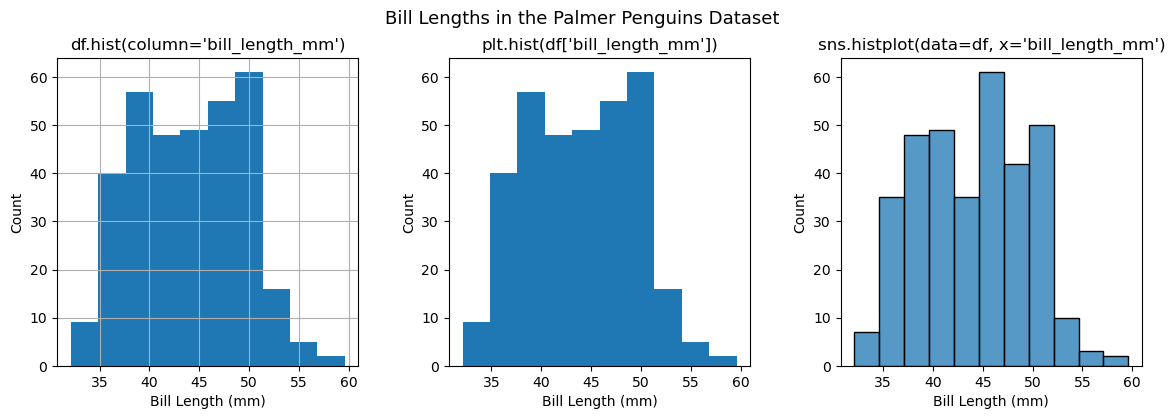

In [16]:
# TODO

# -------------------------
# Answer
# -------------------------
fig,ax = plt.subplots(1, 3, figsize=(14,4))
axs = ax.flatten()

# You can directly create histograms from a DataFrame
plot1 = df.hist(column="bill_length_mm", ax=axs[0])
axs[0].set_title("df.hist(column='bill_length_mm')")
axs[0].set_xlabel("Bill Length (mm)")
axs[0].set_ylabel("Count")

# You can provide a vector to matplotlib to plot as a histogram with plt.hist()
axs[1].hist(df["bill_length_mm"]) # plot2
axs[1].set_title("plt.hist(df['bill_length_mm'])")
axs[1].set_xlabel("Bill Length (mm)")
axs[1].set_ylabel("Count")

# You can also provide the dataframe and column to seaborn with sns.histplot()
plot3 = sns.histplot(data=df, x="bill_length_mm", ax=axs[2])
axs[2].set_title("sns.histplot(data=df, x='bill_length_mm')")
axs[2].set_xlabel("Bill Length (mm)")
axs[2].set_ylabel("Count")

plt.suptitle("Bill Lengths in the Palmer Penguins Dataset", size=13, y=1)

plt.show() # after setting the parameters, display the plot!

When we look at the data, we can see that our distribution looks **bimodal**, meaning that there are two sets of distributions that might be present. If we just considered the numerical summary statistics, we might have missed this detail about our data! Remember, the Palmer Penguins dataset has three different species of penguins present. Let's visualize the `bill_length_mm` column across our three different species and see how that impacts things.

While we can do this manually with the built-in `pandas` plotting function and `matplotlib` function, `seaborn` provides an easier way to visualize data according to different categories with the `hue` parameter for the `sns.histplot()` function. You can also change how the data is visualized for the multiple categories with the `multiple` parameter!

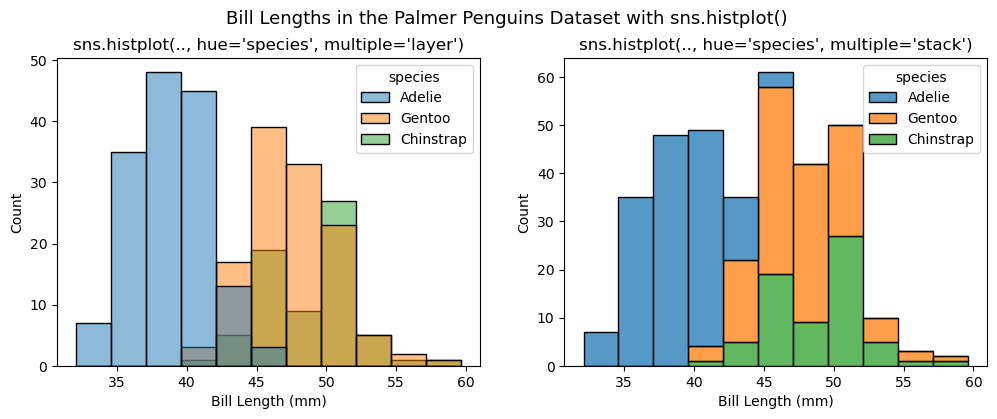

In [17]:
# TODO

# --------------------------------------------------
# Answer
# --------------------------------------------------
fig,ax = plt.subplots(1,2,figsize=(12,4))
axs = ax.flatten()

# Use the hue to visualize the data by species
plot1 = sns.histplot(data=df, x="bill_length_mm", ax=axs[0], hue="species")
axs[0].set_title("sns.histplot(.., hue='species', multiple='layer')")
axs[0].set_xlabel("Bill Length (mm)")
axs[0].set_ylabel("Count")

# Use the hue to visualize the data by species, then change how things are visualized
plot2 = sns.histplot(data=df, x="bill_length_mm", ax=axs[1], hue="species", multiple="stack")
axs[1].set_title("sns.histplot(.., hue='species', multiple='stack')")
axs[1].set_xlabel("Bill Length (mm)")
axs[1].set_ylabel("Count")

plt.suptitle("Bill Lengths in the Palmer Penguins Dataset with sns.histplot()", size=13, y=1)
plt.subplots_adjust(hspace=0.3)

plt.show()

You can also visualize the distributions with separate plots with the FacetGrid functionality in `seaborn`.

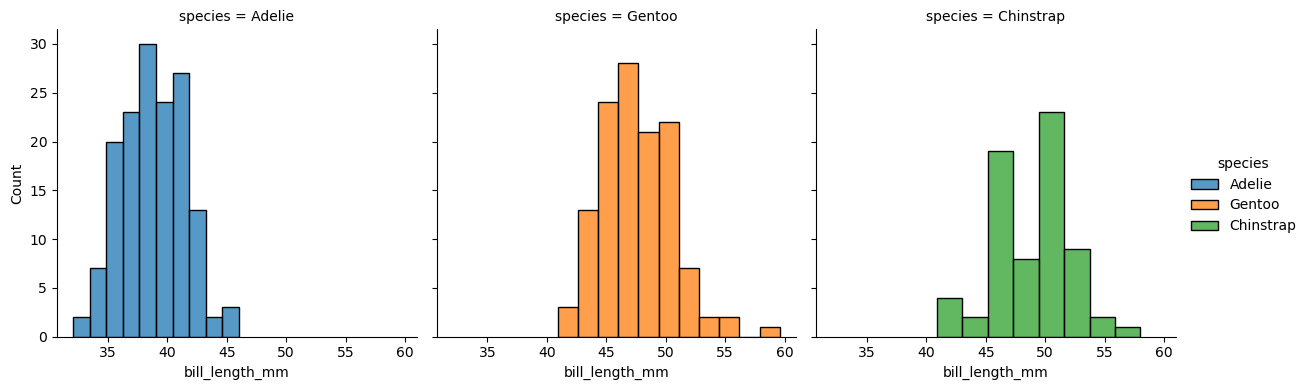

In [ ]:
# TODO

# --------------------------------------------------
# Answer
# --------------------------------------------------
g = sns.FacetGrid(data=df, col="species", hue="species", height=4, aspect=1)
g.map_dataframe(sns.histplot, x="bill_length_mm")
g.add_legend()

plt.show()

#### Box Plots and Violin Plots

Two other common visualizations to look at the distribution of one's data include the **box plot** and **violin plot**. You can also easily generate these plots with `pandas`, `matplotlib`, and `seaborn`!

<div class="alert alert-block alert-danger">
<b>Caution: Missing Values</b>
    <p></p>
    <p>When visualizing data as a <strong>box plot</strong> or <strong>violin plot</strong> with <code>matplotlib</code>, sometimes, you may generate an empty plot! This may be because the vector you are providing to the method contains missing values (also known as <code>NaN</code> and <code>NA</code> values).</p>
    <p>A quick way to remedy this issue is to remove those missing values from your numerical vector; however, depending on your experiment, it might be important to investigate these values further (i.e., you can investigate this by asking questions like "<i>How many missing values do you have?</i>" or "<i>Are missing values associated with a particular phenotype?</i>")</p>.
</div>

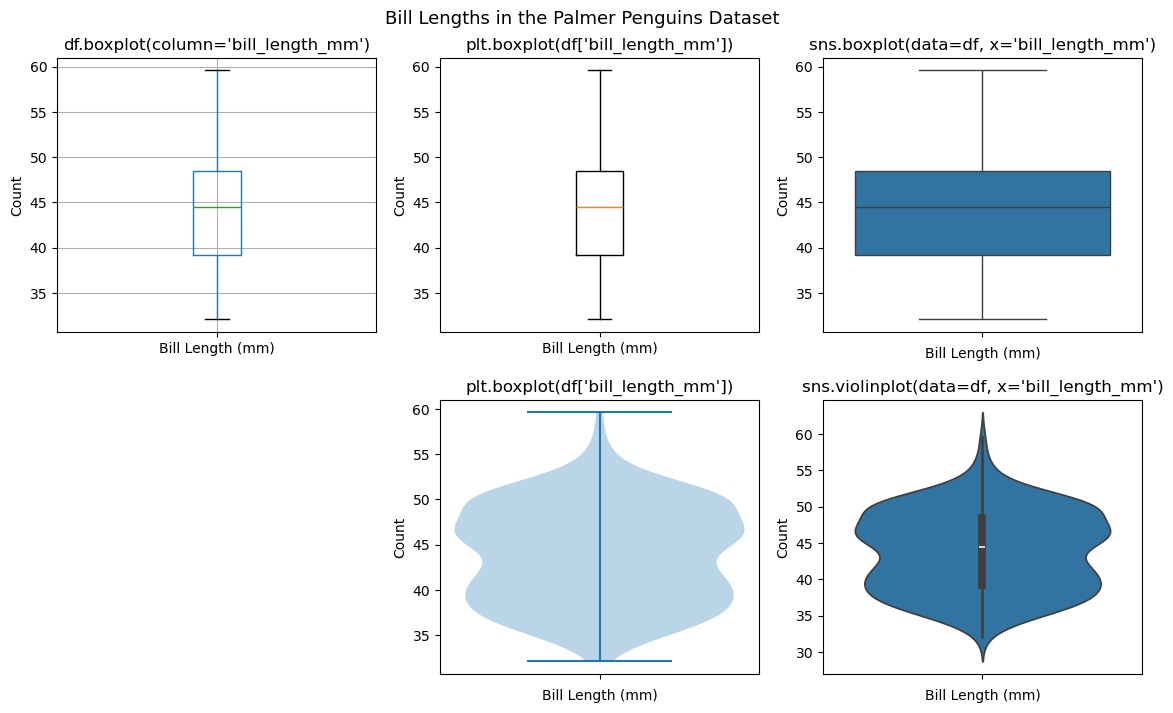

In [ ]:
# TODO

# -------------------------
# Answer
# -------------------------
fig,ax = plt.subplots(2, 3, figsize=(14,8))
axs = ax.flatten()

# -------------------------
# Box Plots
# -------------------------
plot1 = df.boxplot(column="bill_length_mm", ax=axs[0])
axs[0].set_title("df.boxplot(column='bill_length_mm')")
axs[0].set_xticklabels(["Bill Length (mm)"])  # for some reason this is different ...
axs[0].set_ylabel("Count")

axs[1].boxplot(df["bill_length_mm"].dropna()) # we're removing missing values
axs[1].set_title("plt.boxplot(df['bill_length_mm'])")
axs[1].set_xticklabels(["Bill Length (mm)"]) # for some reason this is different ...
axs[1].set_ylabel("Count")

plot3 = sns.boxplot(data=df, y="bill_length_mm", ax=axs[2])
axs[2].set_title("sns.boxplot(data=df, x='bill_length_mm')")
axs[2].set_xlabel("Bill Length (mm)")
axs[2].set_ylabel("Count")

# -------------------------
# Violin Plots
# -------------------------
axs[3].axis("off") # this function doesn't exist in pandas, hide the plot

axs[4].violinplot(df["bill_length_mm"].dropna())  # we're removing missing values
axs[4].set_title("plt.boxplot(df['bill_length_mm'])")
axs[4].set_xticks([1], labels=[""])
axs[4].set_xlabel("Bill Length (mm)")
axs[4].set_ylabel("Count")

plot6 = sns.violinplot(data=df, y="bill_length_mm", ax=axs[5])
axs[5].set_title("sns.violinplot(data=df, x='bill_length_mm')")
axs[5].set_xlabel("Bill Length (mm)")
axs[5].set_ylabel("Count")

plt.suptitle("Bill Lengths in the Palmer Penguins Dataset", size=13, y=.94)
plt.subplots_adjust(hspace=.25)

plt.show() # after setting the parameters, display the plot!

<div class="alert alert-block alert-warning">
<b>Interactive Exercise #6: Visualizing Sex Differences in Body Mass in Gentoo Penguins</b>
    <p></p>
    <p>Now that you know how to subset data and create visualizations, create a plot to compare the distribution of body mass (i.e., <code>body_mass_g</code>) between male and female Gentoo penguins.</p>
    <p>Why did you select the plotting visualization method you chose and what differences are you able to see with your visualization between male and female Gentoo penguins?</p>
</div>

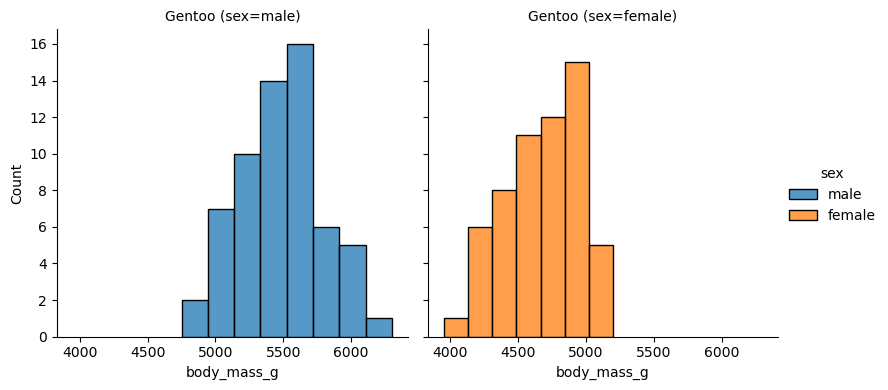

In [ ]:
# TODO

# --------------------------------------------------
# Answer
# --------------------------------------------------
# A very quick way to do this in seaborn is with the FacetGrid method to 
# quickly subset the data by the categories of interest
g = sns.FacetGrid(
    data=df, 
    row="species", 
    row_order=["Gentoo"], 
    col="sex", 
    hue="sex", 
    height=4, 
    aspect=1,
)
g.map_dataframe(sns.histplot, x="body_mass_g")
g.set_titles(template="Gentoo (sex={col_name})")
g.add_legend()

plt.show()

### Other Common Visualizations

While I won't be going in depth on these or asking you to generate these particular visualizations, there are other common plots that you'll see in papers that I recommend looking deeper into by perusing the `matplotlib` and `seaborn` documentation. This section will just contain some examples with my notes added here and there for future reference.

#### Scatter Plots with `matplotlib` and `seaborn`

Scatter plots display paired numerical observations as points and are helpful to visualize relationships between two continuous variables (e.g., gene expression versus some sort of phenotype value). They are especially useful for visualizing trends, correlations, clusters, and possible outliers within your data!

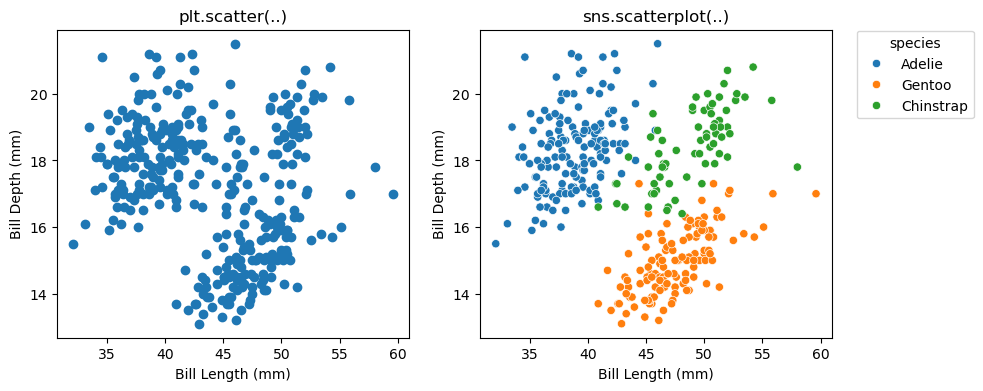

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,4))
axs = ax.flatten()

axs[0].scatter(data=df, x="bill_length_mm", y="bill_depth_mm")
axs[0].set_title("plt.scatter(..)")
axs[0].set_xlabel("Bill Length (mm)")
axs[0].set_ylabel("Bill Depth (mm)")

plot2 = sns.scatterplot(
    data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", ax=axs[1]
)
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1.05, 1.02)) # position legend
axs[1].set_title("sns.scatterplot(..)")
axs[1].set_xlabel("Bill Length (mm)")
axs[1].set_ylabel("Bill Depth (mm)")

plt.show()

#### Swarm Plots, Strip Plots, and Boxen Plots in `seaborn`

Swarm plots, strip plots, and boxen plots all summarize the distribution of a variable across categorical groups and are helpful at emphasizing how values are spread throughout a dataset, rather than just showing their averages. They are similar to violin plots and histograms, however, boxen plots and strip plots in particular are optimized for larger datasets, whereas swarm plots are good in cases when you don't have as many data points to display.

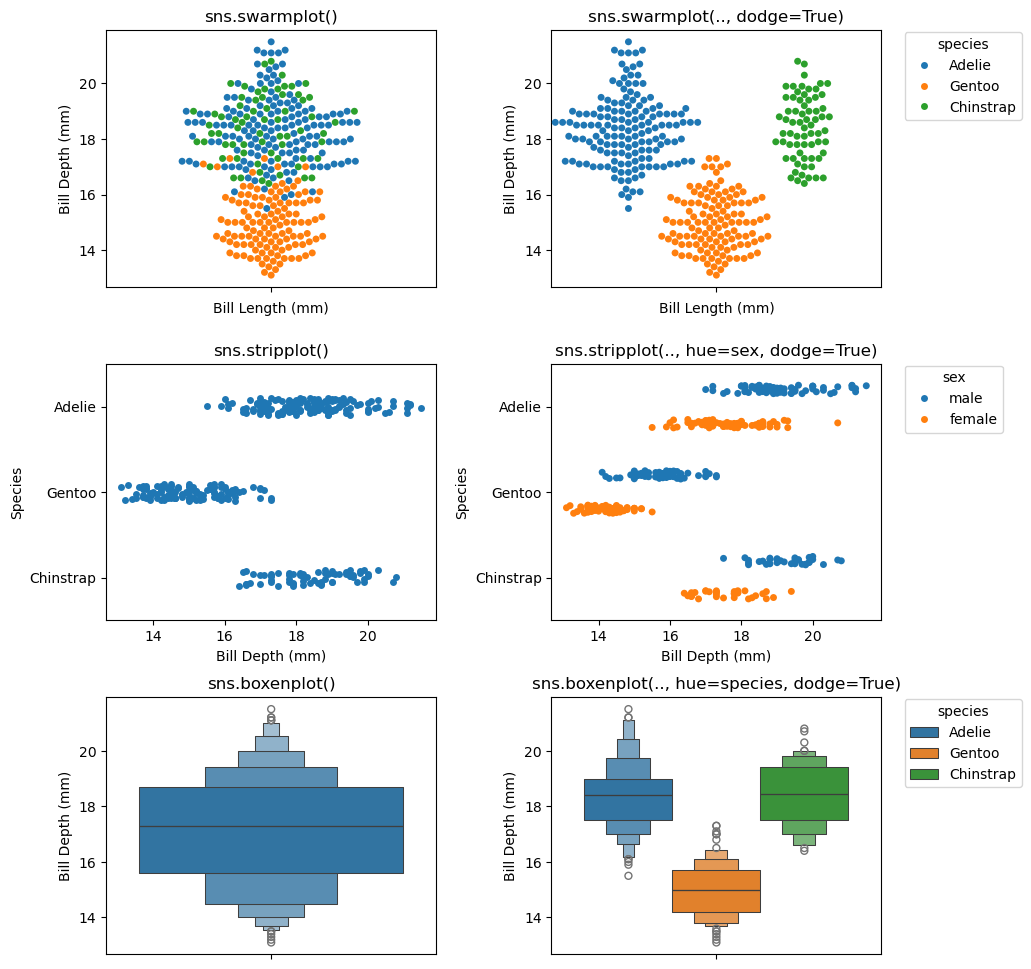

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
axs = ax.flatten()

# --------------------
# Swarm Plots
# --------------------
plot1 = sns.swarmplot(
    data=df,
    y="bill_depth_mm",
    hue="species",
    legend=False,  # hide legend
    ax=axs[0],
)
axs[0].set_title("sns.swarmplot()")
axs[0].set_xlabel("Bill Length (mm)")
axs[0].set_ylabel("Bill Depth (mm)")

plot2 = sns.swarmplot(
    data=df,
    y="bill_depth_mm",
    hue="species",
    dodge=True,  # don't overlap groupings
    ax=axs[1],
)
sns.move_legend(axs[1], "upper left", bbox_to_anchor=(1.05, 1.02))
axs[1].set_title("sns.swarmplot(.., dodge=True)")
axs[1].set_xlabel("Bill Length (mm)")
axs[1].set_ylabel("Bill Depth (mm)")

# --------------------
# Strip Plots
# --------------------
plot3 = sns.stripplot(
    data=df,
    x="bill_depth_mm",
    y="species",
    legend=False,
    s=5,  # set the size of the points in the stripplot
    ax=axs[2],
)
axs[2].set_title("sns.stripplot()")
axs[2].set_ylabel("Species")
axs[2].set_xlabel("Bill Depth (mm)")

plot4 = sns.stripplot(
    data=df,
    x="bill_depth_mm",
    y="species",
    hue="sex",
    dodge=True,
    s=5,
    ax=axs[3],
)
sns.move_legend(axs[3], "upper left", bbox_to_anchor=(1.05, 1.02))
axs[3].set_title("sns.stripplot(.., hue=sex, dodge=True)")
axs[3].set_ylabel("Species")
axs[3].set_xlabel("Bill Depth (mm)")

# --------------------
# Boxen Plots
# --------------------
plot3 = sns.boxenplot(data=df, y="bill_depth_mm", legend=False, ax=axs[4])
axs[4].set_title("sns.boxenplot()")
axs[4].set_ylabel("Bill Depth (mm)")

plot4 = sns.boxenplot(data=df, y="bill_depth_mm", hue="species", dodge=True, ax=axs[5])
sns.move_legend(axs[5], "upper left", bbox_to_anchor=(1.05, 1.02))
axs[5].set_title("sns.boxenplot(.., hue=species, dodge=True)")
axs[5].set_ylabel("Bill Depth (mm)")

plt.subplots_adjust(wspace=.35, hspace=0.3)

plt.show()

#### Heat Maps and Cluster Maps in `seaborn`

Finally, a popular plot to evaluate numerical values in matrix format is the heat map. Heat maps are helpful in visualizing patterns across many variables simultaneously and are commonly used to visualize biological data, such as gene expression, across multiple samples and/or conditions. 

On the other hand, cluster maps extend heat maps by incorporating hierarchical clustering on rows, columns, or both. They are able to group according to similarity metrics (e.g., Euclidean distance) and are often used to cluster similar genes or samples within biological datasets.

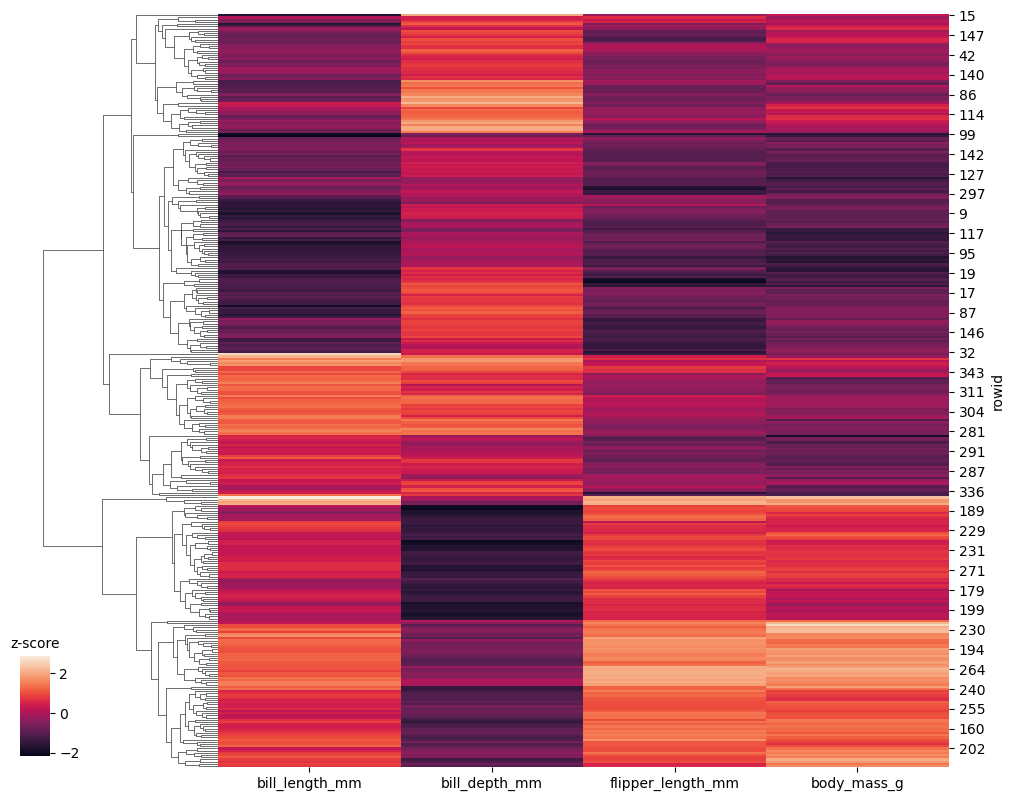

In [23]:
# First, let's grab a subset of what columns we have in the penguin dataset
# and remove rows that have missing values 
column_subset = [
    "species",
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
]
df_subset = df[column_subset].dropna()

# Next, we can generate the heatmap and dendrogram. We'll also be calculating
# the z-score across samples for each column, and then specify that we only
# want to cluster across our samples!
g = sns.clustermap(
    df_subset.drop("species", axis=1), # we can only plot numerical values
    z_score=1, # specify where we want to compute z-scores; 0: columns, 1: rows
    col_cluster=False,
    cbar_pos=(0, 0.05, 0.03, 0.1), # specify the location of the gradient key
)
g.ax_col_dendrogram.set_visible(False)
g.ax_cbar.set_title("z-score", fontsize=10) # formatting of the gradient key
plt.show()


Here is another version of that same plot, but with a few common tweaks that are made in papers, including adding individual `species` information to the `clustermap`!

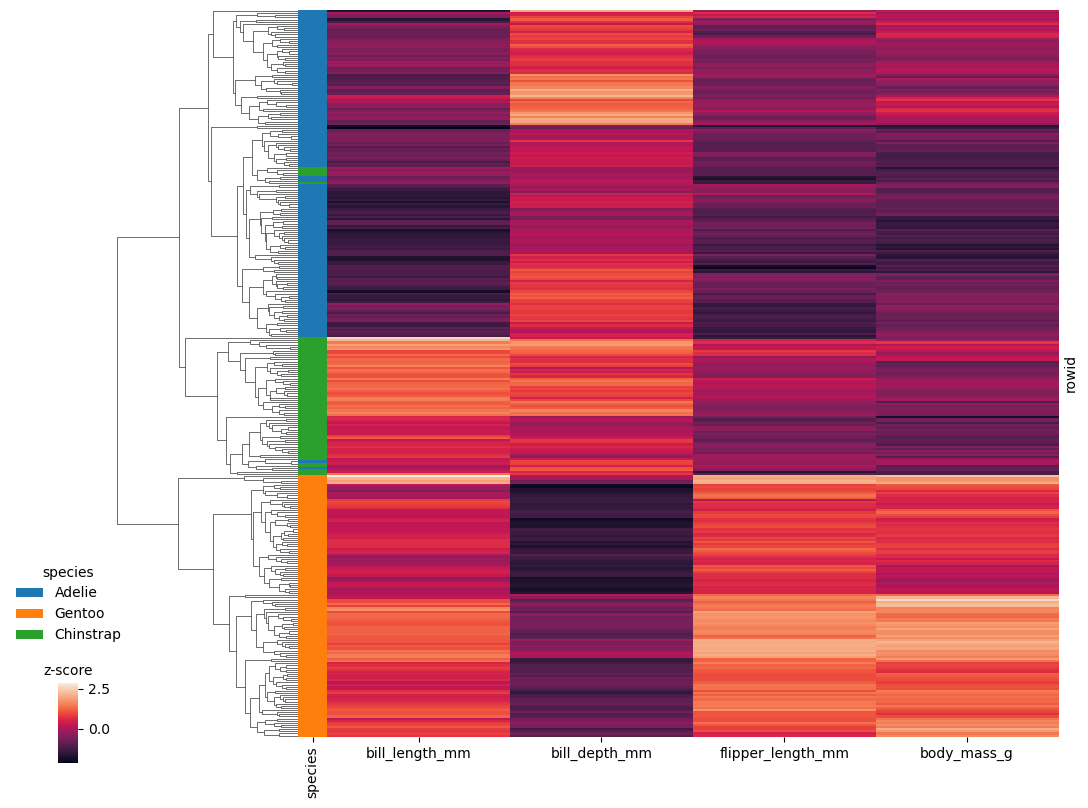

In [27]:
from matplotlib.patches import Patch

# Let's add a color key so that we can label an individual's species in our plot
species = df_subset["species"].unique()
colors = ["tab:blue", "tab:orange", "tab:green"] # keep same colors as before
lut = dict(zip(species, colors))
rowid_to_color = df_subset["species"].map(lut) # map individuals to species colors

# Generate the plot
g = sns.clustermap(
    df_subset.drop("species", axis=1),
    col_cluster=False,
    yticklabels=False, # to generate the plot faster, hide row labels
    z_score=1,
    cbar_pos=(-0.035, 0.05, 0.02, 0.08),
    row_colors=rowid_to_color,
)
g.ax_col_dendrogram.set_visible(False)
g.ax_cbar.set_title("z-score", fontsize=10)

# Create custom legend for species information (won't be included by default)
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(
    handles, # create a "patch"/square of each color we've included
    lut, # translate the color to the species name
    title="species",
    bbox_to_anchor=(-0.09, 0.26), # specify the location of the legend
    bbox_transform=plt.gcf().transFigure,
    loc="upper left",
    edgecolor="#FFFFFF", # hide edge color to match clustermap legend
)

plt.show()
